# LBPH Algorithm

In [160]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

IMG_SIZE = 32
train_limit = 10
test_limit = 10

In [161]:
train_path = "dataset/train/"
test_path = "dataset/test/"

# Our fifth classes
classes = ["aljadd", "langze", "nossaiba", "nouhaila", "unknown"]

# Loading training faces and their labels

In [162]:
faces = []
labels = []
train = []

for person in classes:
    person_path = train_path+person
    q = 0
    for img in tqdm(os.listdir(person_path)):
        image = cv2.imread(os.path.join(person_path, img))
        
        # preprocess
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
        
        faces.append(gray_resized)
        label = classes.index(person)
        labels.append(label)
        train.append([gray_resized, label])
        q += 1
        if q==train_limit+1:
            break

  2%|█▎                                                                               | 10/600 [00:00<00:17, 34.36it/s]


In [163]:
# Shuffling data
random.shuffle(train)

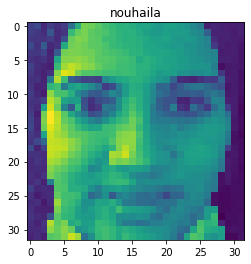

In [185]:
i = random.randint(0, len(train)-1)
plt.imshow(faces[i])
plt.title(classes[labels[i]])
plt.show()

In [186]:
# Create a LBPH recognizer
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

In [148]:
faces_shuffled = []
labels_shuffled = []

for face, label in train:
    faces_shuffled.append(face)
    labels_shuffled.append(label)

In [149]:
# Train our recognizer
face_recognizer.train(faces_shuffled, np.array(labels_shuffled))

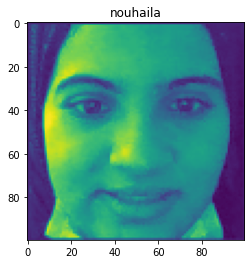

In [150]:
# Make a prediction
i = random.randint(0, len(train)-1)
plt.imshow(faces_shuffled[i])
plt.title(classes[face_recognizer.predict(faces_shuffled[i])[0]])
plt.show()

In [151]:
# Calculating training Accuracy
train_output = []
i = 0
a = 0
#labels_shuffled
for face in faces_shuffled:
    output = face_recognizer.predict(face)[0]
    train_output.append(output)
    if output == labels_shuffled[i]:
        a += 1
    print(str(i)+" out of "+str(len(faces)-1), end="\r")
    i += 1

In [152]:
print("Train accuracy :" + str(a/len(labels_shuffled)))

Train accuracy :1.0


In [153]:
faces_test = []
labels_test = []
test = []

for person in classes:
    person_path = test_path+person
    m = 0
    for img in tqdm(os.listdir(person_path)):
        image = cv2.imread(os.path.join(person_path, img))
        
        # preprocess
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_resized = cv2.resize(gray, (160, 160))
        
        faces_test.append(gray_resized)
        labels_test = classes.index(person)
        labels.append(label)
        test.append([gray_resized, label])
        m += 1
        if m==test_limit+1:
            break

 48%|█████████████████████████████████████▌                                         | 100/210 [00:00<00:00, 195.04it/s]


In [154]:
faces_shuffled_test = []
labels_shuffled_test = []

for face, label in test:
    faces_shuffled_test.append(face)
    labels_shuffled_test.append(label)

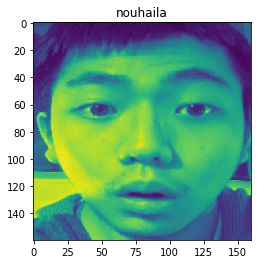

In [155]:
i = random.randint(0, len(test)-1)
plt.imshow(faces_shuffled_test[i])
plt.title(classes[face_recognizer.predict(faces_shuffled_test[i])[0]])
plt.show()

In [156]:
# Test Accuracy
test_output = []
i = 0
k = 0
#labels_shuffled
for face in faces_shuffled_test:
    output = face_recognizer.predict(face)[0]
    test_output.append(output)
    if output == labels_shuffled_test[i]:
        k += 1
    print(str(i)+" out of "+str(len(faces_test)-1), end="\r")
    i += 1

In [157]:
print("Test accuracy :" + str(k/len(labels_shuffled_test)))

Test accuracy :0.12673267326732673


In [158]:
# The model has overfitted the data

In [159]:
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")


while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=3)
    for (x, y, w, h) in faces:
        
        color = (255, 0, 0) 
        stroke = 2
        end_cord_x = x + w
        end_cord_y = y + h 
        
        gray_resized = cv2.resize(gray, (160, 160))
        cv2.rectangle(frame, (x, y), (end_cord_x, end_cord_y), color, stroke)
        p = classes[face_recognizer.predict(gray_resized)[0]]
        cv2.putText(frame, p , (x,y), font, 1, (0, 0, 255), 1,1)

          
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()